# 월간 Dacon 1. - 반도체 data
## 최종 수정일 : 1.26


### 리더보드 종료일자: 2.02 - 본 기간 내에 10회 제출 필수
### 코드 제출 기간: 2.03 ~ 09
### 내부평가: 2.10 ~ 16
### 최종 순위 발표: 2.17

--------

## Data Description
### 1. Target이 4개
### 2. train.csv 파일에는 각 층의 두께와 반사율 스펙트럼이 포함
### 3. 반도체 박막은 얇은 반도체 막으로 박막의 종류와 두께는 반도체 소자의 특성을 결정짓는 중요한 요소 중 하나입니다. 박막의 두께를 측정하는 방법으로 반사율 측정이 널리 사용되며 반사율은 입사광 세기에 대한 반사광 세기의 비율로 정해집니다. (반사율 = 반사광/입사광) 반사율은 빛의 파장에 따라 변하며 파장에 따른 반사율의 분포를 반사율 스펙트럼이라고 합니다. 

--------

## 비고 
### 1. 기간내 최소 10회 이상 제출 필요
### 2. 외부 데이터 사용 불가 
### 3. 참가 팀 상위 5%까지 인증서 제공

--------


## Module & Read the data

In [2]:
import os
import numpy as np
import pandas as pd 
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
from pandas.plotting import scatter_matrix

In [3]:
train = pd.read_csv('train.csv')
train.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [4]:
test = pd.read_csv('test.csv')
test.head()
test.tail()

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
9995,9995,0.199957,0.227188,0.250628,0.265388,0.291736,0.319845,0.339820,0.368420,0.373319,...,0.422622,0.410483,0.409814,0.420162,0.426533,0.445706,0.487397,0.495991,0.534095,0.549278
9996,9996,0.180469,0.142472,0.112432,0.084084,0.071504,0.068979,0.070754,0.063943,0.071106,...,0.745875,0.776221,0.767607,0.774457,0.805273,0.802651,0.810866,0.792099,0.796827,0.791949
9997,9997,0.169476,0.180695,0.225148,0.220553,0.262136,0.288092,0.280675,0.312065,0.304840,...,0.282820,0.296270,0.324376,0.391588,0.436017,0.500170,0.569207,0.623997,0.673445,0.688012
9998,9998,0.218762,0.204023,0.207701,0.198991,0.188334,0.173722,0.161461,0.155859,0.136998,...,0.650535,0.662007,0.688480,0.708460,0.722464,0.726888,0.758949,0.771153,0.769234,0.785455
9999,9999,0.383608,0.355178,0.347031,0.338729,0.315327,0.316411,0.318317,0.285892,0.275320,...,0.321021,0.335527,0.339900,0.352514,0.388642,0.390270,0.406929,0.446899,0.451189,0.472153


In [9]:
sample_sub = pd.read_csv('sample_submission.csv')
sample_sub.tail()

,id,layer_1,layer_2,layer_3,layer_4
9995,9995,0.0,0.0,0.0,0.0
9996,9996,0.0,0.0,0.0,0.0
9997,9997,0.0,0.0,0.0,0.0
9998,9998,0.0,0.0,0.0,0.0
9999,9999,0.0,0.0,0.0,0.0


-------

## EDA

In [12]:
print('Train shape', train.shape)
print('Test shape',  test.shape)

Train shape (810000, 230)
Test shape (10000, 227)


### Missing check
#### No NAs

In [29]:
print(train[train.isnull().any(axis=1)].head())

Empty DataFrame
Columns: [layer_1, layer_2, layer_3, layer_4, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, ...]
Index: []

[0 rows x 230 columns]


### Value counts
#### layer의 종류는 30개 고정. 반사율도 몇몇 중복 있음

In [39]:
test_noid = test.drop(['id'], axis='columns', inplace=True)

traintest = pd.concat([train, test_noid], axis = 0)

In [40]:
traintest.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [41]:
# `dropna = False` makes nunique treat NaNs as a distinct value
feats_counts = train.nunique(dropna = False)

In [42]:
feats_counts.sort_values()[:10]

layer_1        30
layer_2        30
layer_3        30
layer_4        30
225        779868
224        780235
222        780258
223        780536
220        780719
221        780827
dtype: int64

### Duplicates
#### No Duplicates

In [45]:
train_enc =  pd.DataFrame(index = train.index)

for col in tqdm_notebook(traintest.columns):
    train_enc[col] = train[col].factorize()[0]

In [46]:
dup_cols = {}

for i, c1 in enumerate(tqdm_notebook(train_enc.columns)):
    for c2 in train_enc.columns[i + 1:]:
        if c2 not in dup_cols and np.all(train_enc[c1] == train_enc[c2]):
            dup_cols[c2] = c1

In [47]:
dup_cols

{}

### Corr Plot
#### Variance Transformation 전: 
#### 1. Layer와 거의 상관관계가 존재하지 않는다.
#### 2. 본인 번호 기준 10차이정도 까진 양의 선형. 10~30차이정도까진 음의 선형 관계. 그 이후 변수들과는 관계 무

In [5]:
num_cols = list(train.select_dtypes(exclude=['object']).columns)

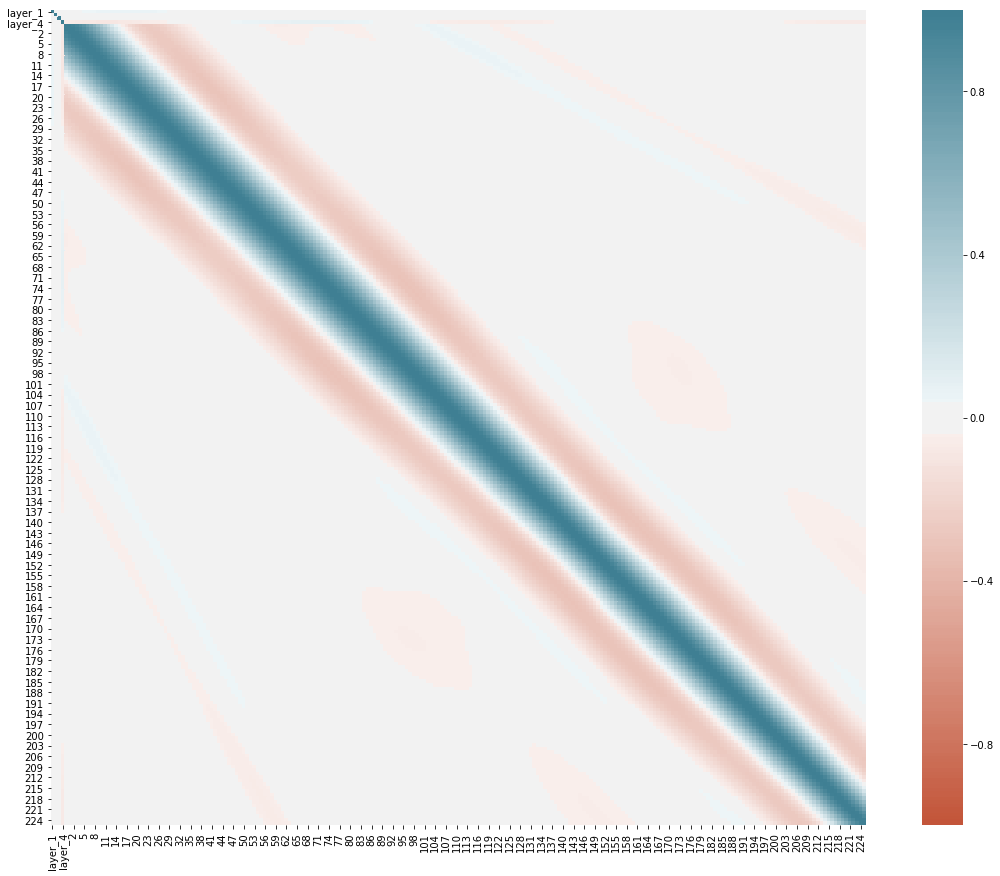

In [4]:
corr = train.corr()

plt.figure(figsize=(20,15))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

#### After Transformation
#### 변환전과 다를바 없음

In [6]:
layers = num_cols[0:4]

train_trans = pd.concat([train[layers], train.iloc[:,4:]*100], axis=1)

In [ ]:
corr_trans = train_trans.corr()

plt.figure(figsize=(20,15))
ax = sns.heatmap(
    corr_trans, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

### Target info
#### 10~300까지의 판막이 27,000개씩 동일하게 분포함. 30의 4제곱 = 810,000

In [69]:
data = train[layers]
data.head()

,layer_1,layer_2,layer_3,layer_4
0,10,10,10,10
1,10,10,10,20
2,10,10,10,30
3,10,10,10,40
4,10,10,10,50


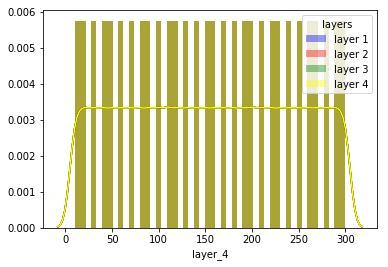

In [78]:
sns.distplot(data["layer_1"], color="blue", label="layer 1")
sns.distplot(data["layer_2"], color="red", label="layer 2")
sns.distplot(data["layer_3"], color="green", label="layer 3")
sns.distplot(data["layer_4"], color="yellow", label="layer 4")

plt.legend(title="layers")

plt.show()

In [85]:
data["layer_1"].value_counts()

300    27000
290    27000
20     27000
30     27000
40     27000
50     27000
60     27000
70     27000
80     27000
90     27000
100    27000
110    27000
120    27000
130    27000
140    27000
150    27000
160    27000
170    27000
180    27000
190    27000
200    27000
210    27000
220    27000
230    27000
240    27000
250    27000
260    27000
270    27000
280    27000
10     27000
Name: layer_1, dtype: int64

### Variables Info
#### 

In [9]:
feats1 = num_cols[0:15]
feats2 = layers + num_cols[15:25]
# feats3 = layers + num_cols[205:]

data1 = train[feats1]
data2 = train[feats2]
# data3 = train[feats3]

<Figure size 720x360 with 0 Axes>

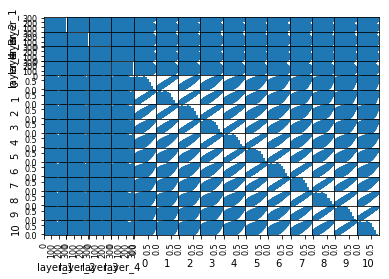

In [8]:
plt.figure(figsize=(20,15))

scatter_matrix(data1)
plt.show()

<Figure size 1440x1080 with 0 Axes>

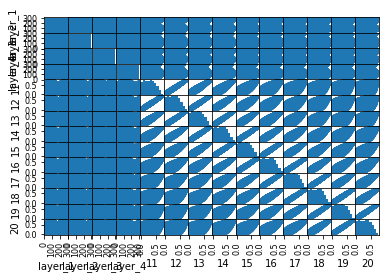

In [10]:
plt.figure(figsize=(20,15))

scatter_matrix(data2)
plt.show()

<Figure size 1440x1080 with 0 Axes>

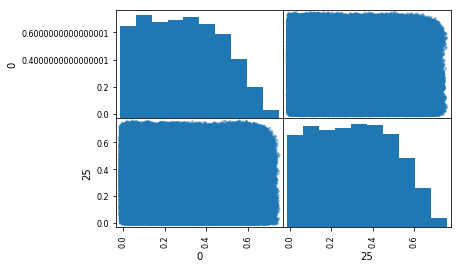

In [27]:
plt.figure(figsize=(20,15))

scatter_matrix(train[['0','25']])
plt.show()

<Figure size 1440x1080 with 0 Axes>

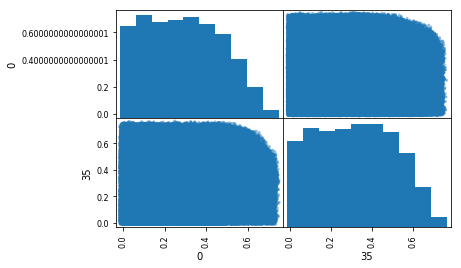

In [28]:
plt.figure(figsize=(20,15))

scatter_matrix(train[['0','35']])
plt.show()

<Figure size 1440x1080 with 0 Axes>

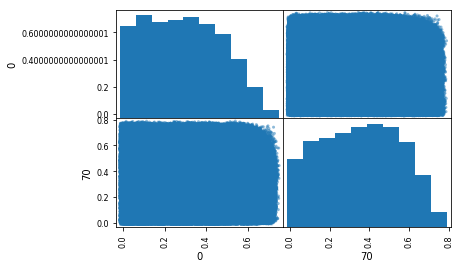

In [29]:
plt.figure(figsize=(20,15))

scatter_matrix(train[['0','70']])
plt.show()